## Web Scraping
### Web scraping is required when you want to automatically extract data from websites that don’t provide an API or downloadable data, or when the available data needs to be updated frequently or in bulk.

Why Web Scraping is Required:
- No API or Data Download Option ->
  Example: Extracting company financial data from a Wikipedia page that’s not            available via API.
- Automating Data Collection ->
  Example: Gathering prices from e-commerce websites daily for competitive analysis.
- Real-time or Regular Updates ->
  Example: Scraping news headlines or stock prices every hour for a dashboard.
- Large-scale Data Mining ->
  Collecting product reviews from all pages on Amazon for sentiment analysis.
- Customized Dataset Creation ->
  Example: Building your own local database of job listings filtered by location,        role, and company.

In [1]:
# Import BeautifulSoup from bs4 for HTML parsing and requests for sending HTTP requests
from bs4 import BeautifulSoup
import requests

In [3]:
# Set the Wikipedia URL to scrape data from
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
# Send a GET request to the URL and store the response in 'page'
page = requests.get(url)
# Parse the HTML content of the page using BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
# Find all <table> tags in the HTML; assuming the first table is the required one
table = soup.find_all('table')[0]

#soup.find('table')
#soup.find_all('table', class_='wikitable sortable') - if multiple tables are present adjust the index or filter by classes

In [7]:
# Extract all header cells (i.e., column names) from the table
world_titles = table.find_all('th')
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [9]:
# Strip whitespace from header texts and store them in a list
world_table_titles = [title.text.strip() for title in world_titles]
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [11]:
# Import pandas for creating and manipulating the DataFrame
import pandas as pd

In [13]:
# Create an empty DataFrame with column headers extracted above
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [15]:
# Get all rows (<tr> tags) of the table, which includes header and data rows
column_data = table.find_all('tr')

In [17]:
# Loop through each data row (skipping the first row which contains headers)
for row in column_data[1:]:
    # Extract all data cells (<td>) from the row
    row_data = row.find_all('td')
    
    # Extract text from each data cell, strip whitespace, and store in a list
    indi_row_data = [data.text.strip() for data in row_data]

    # Get current length (number of rows) of the DataFrame
    length = len(df)

    # Add the current row's data to the DataFrame at the next index
    df.loc[length] = indi_row_data

In [19]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [21]:
# Saves the data into a csv file in the specified folder location
#df.to_csv(r'C:\Users\SPSOFT\Desktop\python\Companies.csv', index=False)

### Exploratory Data Analysis (EDA)

In [24]:
# Basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [26]:
# Statistical analysis of the data
df.describe()  

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,37,98,96,98,71
top,1,Walmart,Financials,"54,317",-3.6%,"45,000","New York City, New York"
freq,1,1,13,2,2,2,13


In [28]:
# column names in the table data
df.columns

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')

In [30]:
# total duplicates in the dataframe
df.duplicated().sum()

np.int64(0)

In [32]:
# checking for null values
df.isnull().sum()

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64

In [34]:
# checking for various industries in the Industry column
df['Industry'].value_counts()   # Financials, Retail, Petroleum industry are the top industries in US

Industry
Financials                             13
Retail                                 10
Petroleum industry                      9
Pharmaceutical industry                 6
Technology                              6
Healthcare                              6
Insurance                               5
Telecommunications                      3
Airline                                 3
Technology and cloud computing          3
Conglomerate                            3
Food processing                         2
Beverage                                2
Automotive industry                     2
Financial                               2
Aerospace and defense                   2
Transportation                          2
Health insurance                        2
Agriculture manufacturing               1
Agriculture cooperative                 1
Information Technology                  1
Telecom hardware manufacturing          1
Apparel                                 1
Energy trading           

In [36]:
# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Feature Engineering - Remove commas and convert to numeric 
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype(float)
# split the headquarters and extract state as it contains both city and state
df['Headquarters_State'] = df['Headquarters'].str.split(',').str[-1].str.strip()

In [40]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Headquarters_State
0,1,Walmart,Retail,648125.0,6.0,"2,100,000","Bentonville, Arkansas",Arkansas
1,2,Amazon,Retail and cloud computing,574785.0,11.9,"1,525,000","Seattle, Washington",Washington
2,3,Apple,Electronics industry,383482.0,-2.8,"161,000","Cupertino, California",California
3,4,UnitedHealth Group,Healthcare,371622.0,14.6,"440,000","Minnetonka, Minnesota",Minnesota
4,5,Berkshire Hathaway,Conglomerate,364482.0,20.7,"396,500","Omaha, Nebraska",Nebraska


In [42]:
top_10_revenue = df.sort_values(by='Revenue (USD millions)', ascending=False).head(10)
print(top_10_revenue[['Name', 'Revenue (USD millions)']])


                   Name  Revenue (USD millions)
0               Walmart                648125.0
1                Amazon                574785.0
2                 Apple                383482.0
3    UnitedHealth Group                371622.0
4    Berkshire Hathaway                364482.0
5            CVS Health                357776.0
6            ExxonMobil                344582.0
7              Alphabet                307394.0
8  McKesson Corporation                276711.0
9               Cencora                262173.0


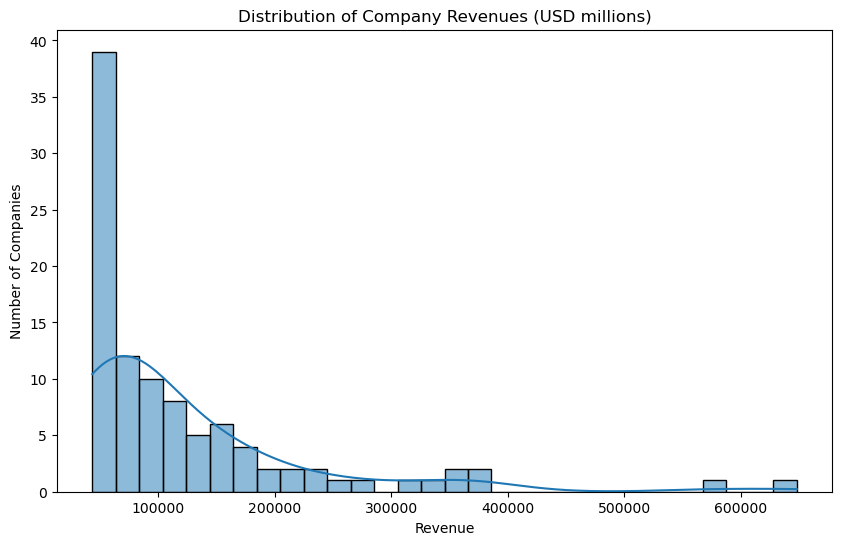

In [44]:
### Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['Revenue (USD millions)'], bins=30, kde=True)
plt.title("Distribution of Company Revenues (USD millions)")
plt.xlabel("Revenue")
plt.ylabel("Number of Companies")
plt.show()


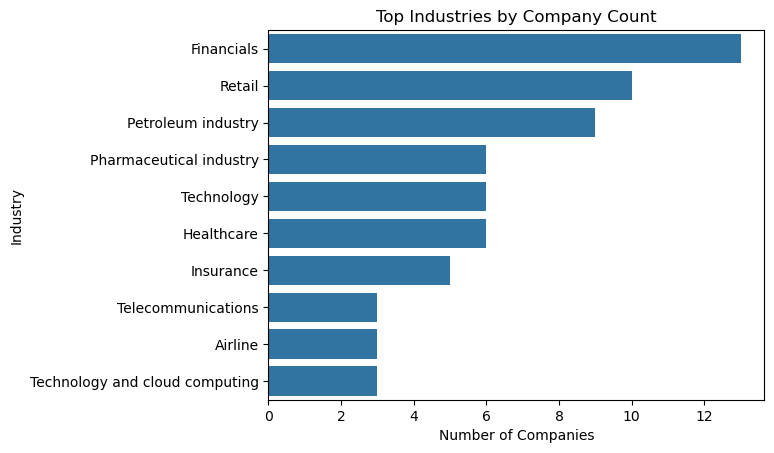

In [45]:
# Top Industries by Count
top_industries = df['Industry'].value_counts().head(10)
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title("Top Industries by Company Count")
plt.xlabel("Number of Companies")
plt.show()


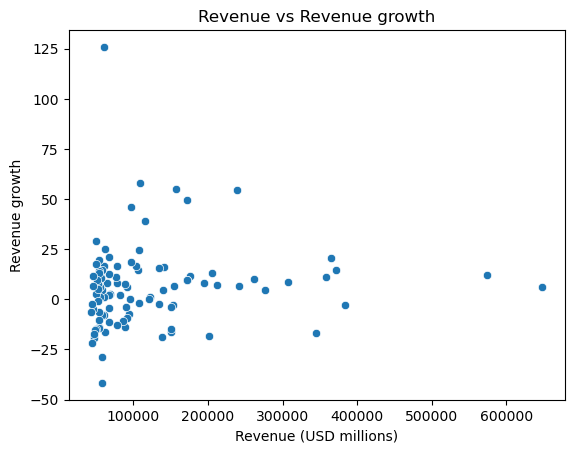

In [48]:
# Correlation: Revenue vs Revenue Growth
sns.scatterplot(data=df, x='Revenue (USD millions)', y='Revenue growth')
plt.title("Revenue vs Revenue growth")
plt.show()


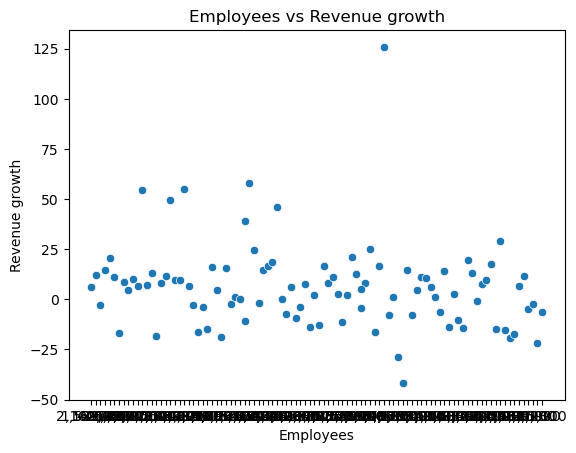

In [50]:
sns.scatterplot(data=df, x='Employees', y='Revenue growth')
plt.title("Employees vs Revenue growth")
plt.show()


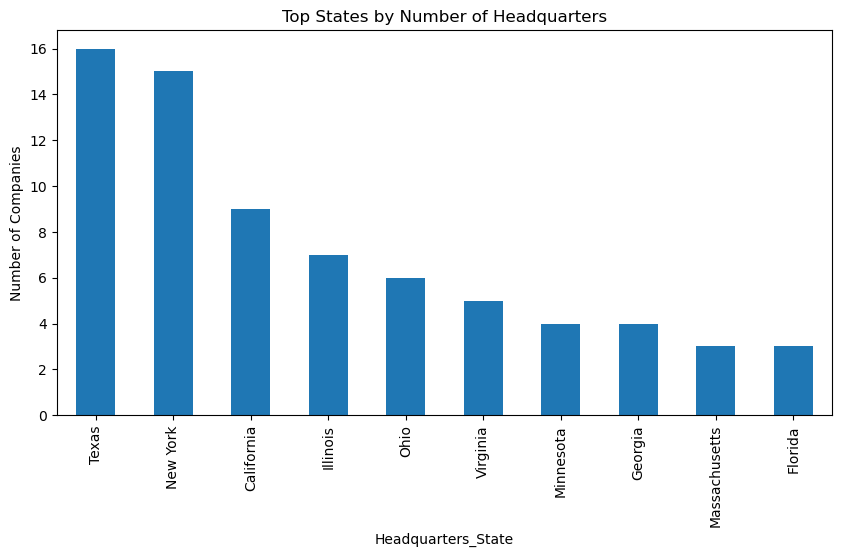

In [51]:
# Top States Hosting Most HQs
state_counts = df['Headquarters_State'].value_counts().head(10)
state_counts.plot(kind='bar', figsize=(10, 5), title='Top States by Number of Headquarters')
plt.ylabel("Number of Companies")
plt.show()


Text(0.5, 1.0, 'Revenue Growth Rate Distribution')

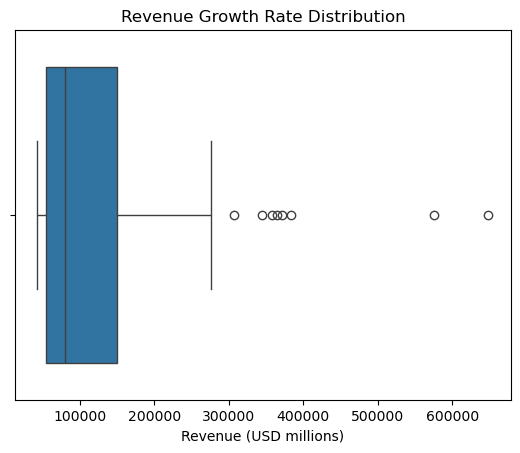

In [53]:
# Revenue Growth Distribution
sns.boxplot(x=df['Revenue (USD millions)'])
plt.title("Revenue Growth Rate Distribution")

Text(0.5, 1.0, 'Revenue vs Revenue Growth by Industry')

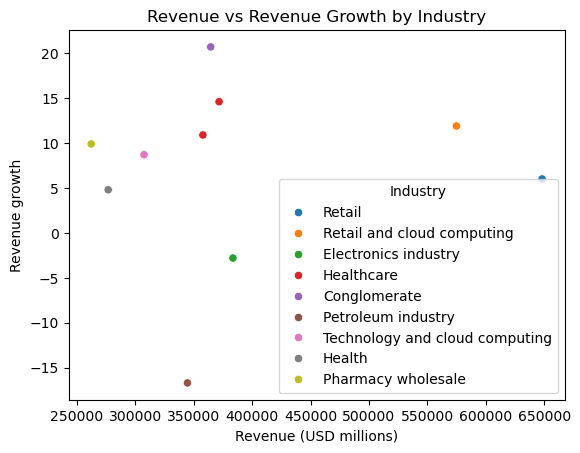

In [56]:
# Bivariate Analysis
# Revenue vs Revenue Growth
sns.scatterplot(data=df.head(10), x='Revenue (USD millions)', y='Revenue growth', hue='Industry')
plt.title("Revenue vs Revenue Growth by Industry")


Text(0.5, 1.0, 'Industries with Highest Average Revenue')

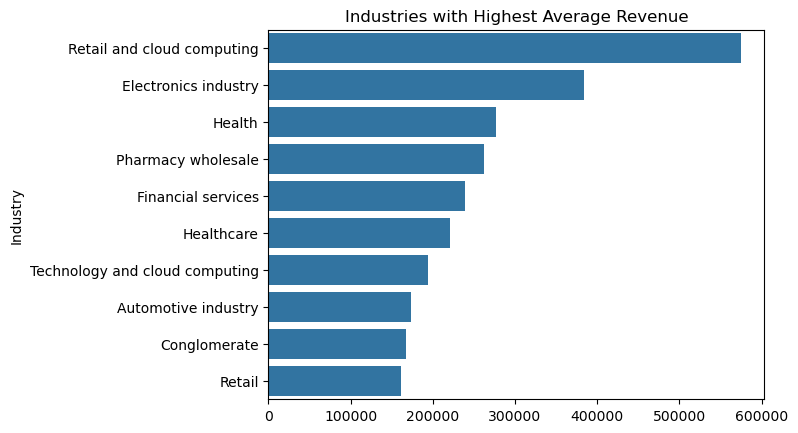

In [58]:
# Industries with hishest average revenue
avg_revenue = df.groupby('Industry')['Revenue (USD millions)'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_revenue.values, y=avg_revenue.index)
plt.title("Industries with Highest Average Revenue")


### Insights of the Revenue of the largest companies in the USA
- Top Industries: Certain industries (like tech or healthcare) dominate revenue growth.
- state HQs: California, Texas, New York host the most headquarters.
- Growth Trends: Some low-revenue companies might show very high growth, indicating emerging sectors.
- Efficiency: Employee count is not always correlated with revenue (e.g., tech firms vs manufacturing).
- Top Revenue Companies: Likely Walmart, Amazon, etc.
- Industry Dominance: Retail, Financial, or Energy may dominate.